# –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [206]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

# import opendatasets as od

In [207]:
# ! pip install kaggle

In [208]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‚Äò/root/.kaggle‚Äô: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [209]:
! kaggle datasets download unsdsn/world-happiness

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [210]:
# ! unzip world-happiness.zip

In [211]:
df = pd.read_csv('2019.csv')
df.head(10)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   
5                    1.052                         0.572       0.263   
6                    1.009                         0.574       0.267   
7                    1.026                         0.585       0.330   
8                    1.039                         0.584       0.285   
9                    1.016                         0.532       0.244   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298  
5                      0.343  
6                      0.373  
7                      0.380  
8                      0.308  
9                      0.226

In [212]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [213]:
df.drop(columns = ['Overall rank', 'Generosity', 'Perceptions of corruption', 'GDP per capita'], inplace=True)

In [214]:
df.describe()

Score  Social support  Healthy life expectancy  \
count  156.000000      156.000000               156.000000   
mean     5.407096        1.208814                 0.725244   
std      1.113120        0.299191                 0.242124   
min      2.853000        0.000000                 0.000000   
25%      4.544500        1.055750                 0.547750   
50%      5.379500        1.271500                 0.789000   
75%      6.184500        1.452500                 0.881750   
max      7.769000        1.624000                 1.141000   

       Freedom to make life choices  
count                    156.000000  
mean                       0.392571  
std                        0.143289  
min                        0.000000  
25%                        0.308000  
50%                        0.417000  
75%                        0.507250  
max                        0.631000

In [215]:
df.info()
# Country or region              //
# Score                          –°—á–µ—Ç
# GDP per capita                 //–í–í–ü –Ω–∞ –¥—É—à—É –Ω–∞—Å–µ–ª–µ–Ω–∏—è
# Social support                 –°–æ—Ü–∏–∞–ª—å–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞
# Healthy life expectancy        –û–∂–∏–¥–∞–µ–º–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–¥–æ—Ä–æ–≤–æ–π –∂–∏–∑–Ω–∏
# Freedom to make life choices   –°–≤–æ–±–æ–¥–∞ –¥–µ–ª–∞—Ç—å –∂–∏–∑–Ω–µ–Ω–Ω—ã–π –≤—ã–±–æ—Ä

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


<Axes: ylabel='Score'>

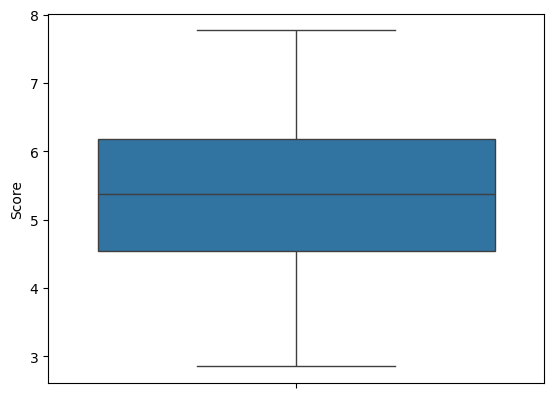

In [216]:
sns.boxplot(df['Score'])

In [217]:
df['Score'].value_counts()

Score
5.208    2
7.769    1
4.883    1
4.812    1
4.799    1
        ..
5.940    1
5.895    1
5.893    1
5.890    1
2.853    1
Name: count, Length: 155, dtype: int64

In [218]:
df['Healthy life expectancy'].value_counts()

Healthy life expectancy
0.999    5
0.815    5
0.828    4
0.871    3
0.874    3
        ..
1.088    1
0.798    1
0.812    1
0.868    1
0.295    1
Name: count, Length: 119, dtype: int64

# –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã)

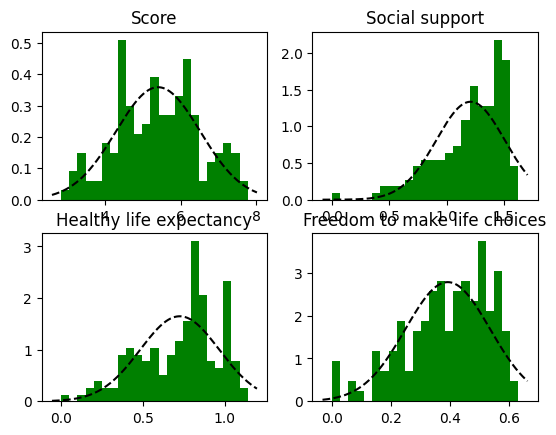

In [219]:
keys = ["Score", "Social support", "Healthy life expectancy", "Freedom to make life choices"]

fig, axes = plt.subplots(2,2)
fig.set_size_inches = (15, 50)
axes = axes.flatten()

for key, ax in zip(keys, axes):
  ax.hist(df[key], density=True, bins=23, color='green')

  loc = df[key].mean()
  scale = df[key].std()

  x_left, x_right = ax.get_xlim()
  x = np.linspace(x_left, x_right, 10000)
  y = stats.norm.pdf(x, loc=loc, scale=scale)

  ax.plot(x, y, linestyle = 'dashed', color='black')
  ax.set_title(key)


–õ–∏–Ω–∏–∏ –ø–æ–≤–µ—Ä—Ö - –∫–∞–∫ –±—ã –≤—ã–≥–ª—è–¥–µ–ª–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–º–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤—ã–±–æ—Ä–æ–∫.

# –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (–∫–≤–∞–Ω—Ç–∏–ª–∏)

Q-Q –∫—Ä–∏–≤–∞—è - –≥—Ä–∞—Ñ–∏–∫, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ–∂–¥—É —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∫–≤–∞–Ω—Ç–∏–ª—è –Ω–∞ –≤—ã–±–æ—Ä–∫–µ –∏ –µ–≥–æ —Ä–µ–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º.


---


F S



S F

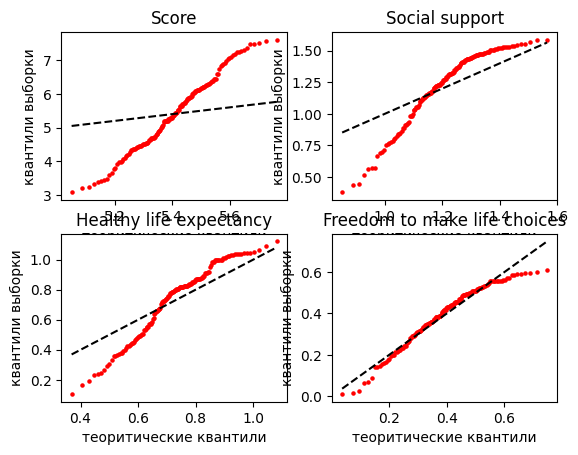

In [220]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches = (20, 15)
axes = axes.flatten()


for key, ax in zip(keys, axes):
  samples = df[key]

  loc = samples.mean()
  scales = samples.std()

  interval = np.linspace(0, 1, samples.shape[0])[1:-1]
  x = stats.norm.ppf(interval, loc=loc, scale=scale)
  y = np.quantile(samples, interval)

  ax.scatter(x, y, s=5, color='red')
  ax.plot(x, x, color='black', linestyle = 'dashed')

  ax.set_title(key)
  ax.set_xlabel('—Ç–µ–æ—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∫–≤–∞–Ω—Ç–∏–ª–∏')
  ax.set_ylabel('–∫–≤–∞–Ω—Ç–∏–ª–∏ –≤—ã–±–æ—Ä–∫–∏')

  # f s
  # s f

# –°—Ç–∞—Å—Ç–∏—á–µ—Å–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–ª—è –≤—ã–±–æ—Ä–æ–∫

–û—Ü–µ–Ω–∏–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –≤—ã–±–æ—Ä–æ–∫ —Ç–∞–∫–∂–µ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∏–∑–≤–µ—Å—Ç–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
-–í —á–∞—Å—Ç–Ω–æ—Å—Ç–∏:
* –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–æ–ø–∞—Å—Ç—å –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç  ùúá‚àíùúé  –¥–æ  ùúá +ùúé  —Ä–∞–≤–Ω–∞  0.68 ,
* –í –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç  ùúá‚àí2ùúé  –¥–æ  ùúá+2ùúé  ‚Äî  0.95 ,
* –í –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç  ùúá‚àí3ùúé  –¥–æ  ùúá+3ùúé  ‚Äî  0.997

In [221]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

Score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6987179487179487
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9807692307692307
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Social support
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.717948717948718
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9487179487179487
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9935897435897436

Healthy life expectancy
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6217948717948718
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.967948717948718
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Freedom to make life choices
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6602564102564102
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9551282051282052
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0



# –ö–æ—Ä–µ–ª–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Å–µ—Ç–∫–∞ - —Ç–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞

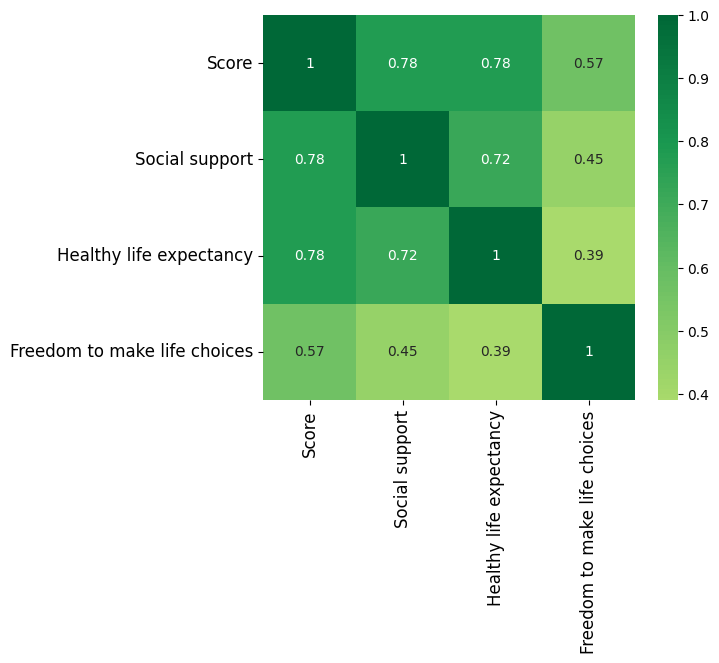

In [222]:
#heatmap –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ.
df_corr = df[keys].corr()

plt.figure(figsize=(6,5))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='RdYlGn',
            center=0,
            annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Score                          –°—á–µ—Ç
# Social support                 –°–æ—Ü–∏–∞–ª—å–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞
# Healthy life expectancy        –û–∂–∏–¥–∞–µ–º–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–¥–æ—Ä–æ–≤–æ–π –∂–∏–∑–Ω–∏
# Freedom to make life choices   –°–≤–æ–±–æ–¥–∞ –¥–µ–ª–∞—Ç—å –∂–∏–∑–Ω–µ–Ω–Ω—ã–π –≤—ã–±–æ—Ä

In [223]:
columns_drop_02 = []
target_col = 'Score'
keys = ['Social support',
        'Healthy life expectancy',
        'Freedom to make life choices']
data = df[keys]

for i in data.columns:
  if df_corr.loc[target_col, i] < 0.7:
    columns_drop_02.append(i)

columns_drop_02

['Freedom to make life choices']

In [224]:
data.drop(columns=columns_drop_02, inplace = True)

<ipython-input-224-0a093e4005f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_drop_02, inplace = True)


In [225]:
data.columns

Index(['Social support', 'Healthy life expectancy'], dtype='object')

In [226]:
# –∫–æ–ª–ª–∏–Ω–µ—Ä–∞–Ω—ã (–∫–æ—Ä—Ä >= 0.7):

–ß–∞—Å—Ç–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É $(z)$ –∏ $(x)$ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–∏–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (y) –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: \

$[ r_{zy \cdot x} = \frac{r_{zy} - r_{xy} \cdot r_{zx}}{\sqrt{(1 - r_{xy}^2)(1 - r_{zx}^2)}} ]$

–î–ª—è –∫–∞–∂–¥–æ–≥–æ —Ñ–∞–∫—Ç–æ—Ä–∞ ‚Äú—Ñ–∏–∫—Å–∏—Ä—É–µ–º‚Äù –µ–≥–æ –≤ –º–æ–¥–µ–ª–∏ –∏ –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º –æ—Å—Ç–∞–≤—à–∏–µ—Å—è —Ñ–∞–∫—Ç–æ—Ä—ã, —Å—á–∏—Ç–∞—è —á–∞—Å—Ç–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã.
–†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –¥–ª—è r


In [227]:
def r_zxi_xj(r_zxi, r_xixj, r_zxj):
  return (r_zxi - r_xixj*r_zxj) / ((1-r_zxj**2) * (1-r_xixj**2))**0.5

In [228]:
# r_z_xi_xj
# xi - —Ñ–∏–∫—Å
# xj - –º–µ–Ω—è–µ–º

delta_matrix = pd.DataFrame(index=data.columns, columns=data.columns)

for i in data.columns:
  # print(f"–§–∏–∫—Å–∏—Ä—É–µ–º  {i}:")
  delta_count = 0
  delta_sum = 0
  r_z_xi = df_corr.loc[target_col, i]
  for j in data.columns:
    if i != j:
      r_z_xj = df_corr.loc[target_col, j]
      r_z_xi = df_corr.loc[target_col, i]
      r_xi_xj = df_corr.loc[i, j]

      # –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è price –∏ j –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º i
      New_Corr = r_zxi_xj(r_z_xi, r_xi_xj, r_z_xj)

      delta = abs(r_z_xi - New_Corr)
      delta_sum += delta

      delta_matrix.loc[i, j] = delta
    delta_matrix.loc[i, i] = 0

delta_matrix = delta_matrix.apply(pd.to_numeric, errors='coerce')

# delta_matrix
# —Å–ª–µ–≤–∞ -  —Ç–æ —á—Ç–æ —Ñ–∏–∫—Å
# –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ = –∏–∑–º–µ–Ω—è–µ–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

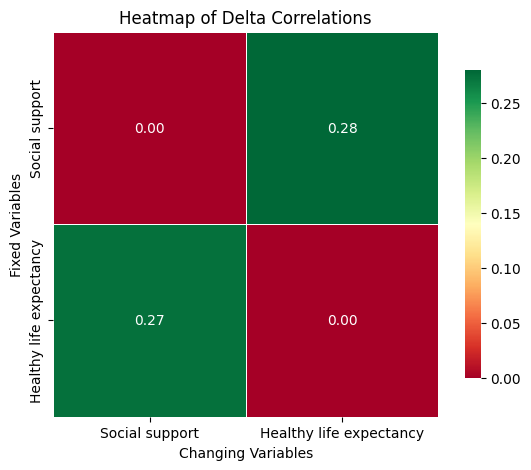

In [229]:
plt.figure(figsize=(7, 5))

sns.heatmap(delta_matrix, annot=True, fmt=".2f", cmap='RdYlGn', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)

plt.title('Heatmap of Delta Correlations')
plt.xlabel('Changing Variables')
plt.ylabel('Fixed Variables')
plt.show()